In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [68]:
from math import pi 

## Importing Extracted Dataset

In [4]:
df=pd.read_csv('Vehicle Telematics (Complete).csv', index_col=0, low_memory=False)
df.head()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,...,rpm,speed,tAdv,tPos,x,y,z,mx,my,mz
0,1,0,22-12-2017 18:43:05,"[[-0.7125646799364715, 0.23595627204810762, -0...",24.2612,0.0,66,0,28.6275,40,...,1010.75,23,0.0,0.0,-0.712565,-0.102792,-0.642793,-0.606691,-0.242957,0.750273
1,1,0,22-12-2017 18:43:06,"[[0.4707973949441242, 0.2820489662721335, -0.8...",23.1500,0.0,66,0,33.7255,40,...,815.50,21,0.0,0.0,0.470797,-0.012553,0.870071,-0.823183,0.311466,0.450998
2,1,0,22-12-2017 18:43:07,"[[0.363406940121187, 0.6533333333333333, -0.64...",18.7052,0.0,66,0,43.1373,40,...,862.25,17,0.0,0.0,0.363407,0.661540,-0.636267,-0.644692,-0.309709,-0.649965
3,1,0,22-12-2017 18:43:08,"[[-0.07687828192948323, 0.3061005733016679, 0....",16.4828,0.0,66,0,41.5686,40,...,817.00,17,0.0,0.0,-0.076878,-0.191656,0.956181,0.925914,0.283531,0.170642
4,1,0,22-12-2017 18:43:09,"[[-0.4349511173745513, 0.13824774070828527, -0...",17.4088,0.0,66,0,43.1373,40,...,804.25,15,0.0,0.0,-0.434951,-0.002994,-0.867992,-0.856917,-0.154537,0.469679


In [66]:
df.info(null_counts=True)

C:\Users\Mukul\AppData\Local\Temp\ipykernel_19416\1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048564 entries, 0 to 1048563
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   tripID                1048564 non-null  int64  
 1   deviceID              1048564 non-null  int64  
 2   timeStamp             1048564 non-null  object 
 3   accData               1048564 non-null  object 
 4   gps_speed             1048564 non-null  float64
 5   battery               1048564 non-null  float64
 6   cTemp                 1048564 non-null  int64  
 7   dtc                   1048564 non-null  int64  
 8   eLoad                 1048564 non-null  float64
 9   iat                   1048564 non-null  int64  
 10  imap                  1048564 non-null  int64  
 11  kpl                   1048564 non-null  float64
 12  maf                   1048564 non-null  float64
 13  rpm                   1048564 non-null  float64
 14  speed                 1048564 non-

## Correlation

In [6]:
df.corr()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_7768\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,tripID,deviceID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,...,rpm,speed,tAdv,tPos,x,y,z,mx,my,mz
tripID,1.000000,0.174439,0.009908,-0.231971,-0.046433,NaN,-0.038470,-0.134583,0.055351,-0.004232,...,-0.084891,-0.006972,-0.122748,-0.064419,-0.030431,-0.112147,0.005889,0.021337,-0.043562,0.042597
deviceID,0.174439,1.000000,-0.100425,-0.099714,0.004800,NaN,-0.026836,-0.008237,-0.013881,0.097326,...,-0.100866,-0.114493,-0.054525,0.052383,0.011362,0.079850,-0.000070,-0.003216,-0.006203,-0.093959
gps_speed,0.009908,-0.100425,1.000000,-0.008127,0.505957,NaN,0.369082,0.319224,0.579145,0.444785,...,0.743604,0.950940,0.033001,0.209703,0.020793,0.044275,-0.012677,-0.018618,0.023013,0.076514
battery,-0.231971,-0.099714,-0.008127,1.000000,0.182852,NaN,0.087087,0.198128,-0.283669,0.464073,...,0.219936,0.010960,0.512173,0.381240,-0.008706,0.001685,0.005743,0.025548,-0.022716,-0.383004
cTemp,-0.046433,0.004800,0.505957,0.182852,1.000000,NaN,0.534672,0.879733,0.769870,0.362756,...,0.766031,0.534233,0.080958,0.253153,0.023251,0.049139,-0.016609,-0.025309,0.020078,0.070973
dtc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eLoad,-0.038470,-0.026836,0.369082,0.087087,0.534672,NaN,1.000000,0.501975,0.594742,0.149106,...,0.548172,0.417653,0.102707,0.247052,0.024069,0.048970,-0.011340,-0.020665,0.017662,-0.018160
iat,-0.134583,-0.008237,0.319224,0.198128,0.879733,NaN,0.501975,1.000000,0.692645,0.252113,...,0.646121,0.339157,0.083179,0.145374,0.022147,0.008018,-0.012773,-0.014137,0.005493,-0.029702
imap,0.055351,-0.013881,0.579145,-0.283669,0.769870,NaN,0.594742,0.692645,1.000000,0.081513,...,0.736642,0.608068,-0.127996,0.142676,0.025501,0.029951,-0.017710,-0.030506,0.025716,0.225222
kpl,-0.004232,0.097326,0.444785,0.464073,0.362756,NaN,0.149106,0.252113,0.081513,1.000000,...,0.453665,0.464026,0.065821,0.222986,0.013808,0.096680,-0.003623,-0.015879,0.018471,-0.179593


## Covariance

In [7]:
df.cov()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_7768\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,tripID,deviceID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,...,rpm,speed,tAdv,tPos,x,y,z,mx,my,mz
tripID,12495.334178,74.615191,29.763638,-114.564722,-181.847265,0.0,-121.368039,-236.866911,297.881533,-4.091832,...,-6043.887409,-20.189207,-86.025274,-86.189047,-1.542383,-3.440250,0.435076,1.596617,-0.958010,2.299190
deviceID,74.615191,14.642712,-10.327037,-1.685828,0.643501,0.0,-2.898239,-0.496287,-2.557253,3.221399,...,-245.832285,-11.350151,-1.308107,2.399172,0.019714,0.083852,-0.000178,-0.008238,-0.004670,-0.173607
gps_speed,29.763638,-10.327037,722.177808,-0.964989,476.369351,0.0,279.931359,135.069190,749.296474,103.389659,...,12727.560795,662.042705,5.560131,67.451266,0.253358,0.326522,-0.225178,-0.334923,0.121671,0.992854
battery,-114.564722,-1.685828,-0.964989,19.520382,28.304241,0.0,10.859411,13.782550,-60.339231,17.735164,...,618.903446,1.254468,14.187280,20.160711,-0.017442,0.002043,0.016771,0.075559,-0.019745,-0.817099
cTemp,-181.847265,0.643501,476.369351,28.304241,1227.485669,0.0,528.691140,485.286485,1298.583612,109.932882,...,17093.697990,484.897241,17.782981,106.158458,0.369347,0.472450,-0.384603,-0.593561,0.138390,1.200640
dtc,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
eLoad,-121.368039,-2.898239,279.931359,10.859411,528.691140,0.0,796.550285,223.063321,808.126963,36.400415,...,9853.835127,305.374445,18.173783,83.456051,0.308010,0.379284,-0.211547,-0.390412,0.098071,-0.247485
iat,-236.866911,-0.496287,135.069190,13.782550,485.286485,0.0,223.063321,247.901020,525.042163,34.335134,...,6479.394349,138.340834,8.210914,27.396058,0.158100,0.034642,-0.132918,-0.148997,0.017015,-0.225806
imap,297.881533,-2.557253,749.296474,-60.339231,1298.583612,0.0,808.126963,525.042163,2317.864781,33.944798,...,22588.216418,758.415272,-38.634921,82.216429,0.556670,0.395707,-0.563535,-0.983116,0.243577,5.235628
kpl,-4.091832,3.221399,103.389659,17.735164,109.932882,0.0,36.400415,34.335134,33.944798,74.818609,...,2499.320382,103.981891,3.569484,23.085877,0.054155,0.229496,-0.020715,-0.091940,0.031433,-0.750101


# Engine Load vs. Fuel Efficiency

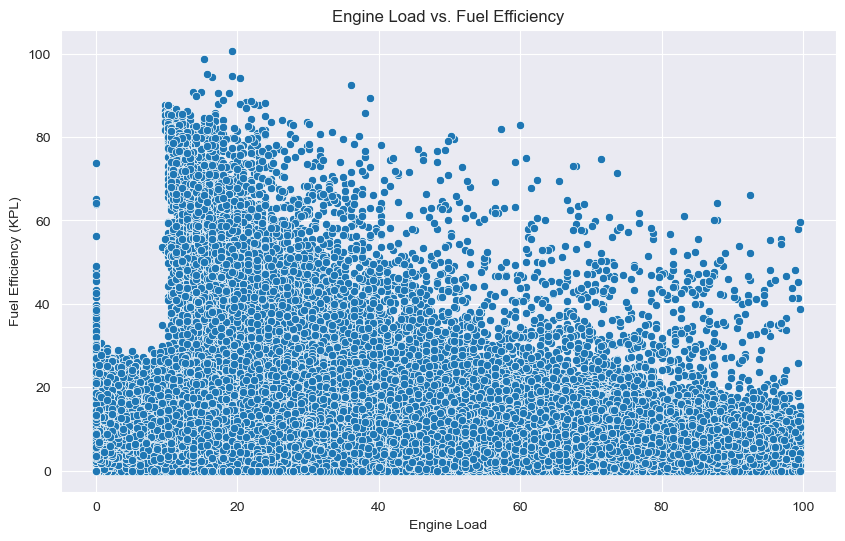

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='eLoad', y='kpl', data=df)
plt.title('Engine Load vs. Fuel Efficiency')
plt.xlabel('Engine Load')
plt.ylabel('Fuel Efficiency (KPL)')
plt.show()

The following visualization between the Engine Load and Fuel Efficiency (KPL) signifies the following: 

1). Low Engine Load (up to 10%): At low engine loads, the engine is not working very hard, and the throttle position is relatively closed. This typically results in good fuel efficiency because the engine is operating with less resistance and can maintain a more efficient air-fuel mixture.

2). Optimal Engine Load (around 10%): There's often an optimal or "sweet spot" engine load where the engine operates most efficiently. This is typically around 10-20% engine load for many vehicles. At this point, the engine is efficiently balancing power output and fuel consumption.

3). High Engine Load (beyond 10%): As engine load continues to increase beyond the optimal range, several factors can lead to decreased fuel efficiency:

4). Increased Throttle Opening: To meet higher power demands, the throttle is opened wider, which allows more air into the engine. This can lead to a richer air-fuel mixture, which consumes more fuel.

5). Higher RPM: Higher engine loads often result in higher RPM, which can increase fuel consumption.

**The peak efficiency of a car engine is somewhere midrange, with inefficiencies under both high and low loadings. At 10% loading, the efficiency is still better than half what it is at peak, as observed from the above visualiztion**

A correlation coefficient of **0.149106** between engine load and fuel efficiency indicates a relatively weak positive linear relationship between these two variables. This means that as engine load increases, there is a slight tendency for fuel efficiency to improve, but the relationship is not strong.

# RPM vs. Fuel Efficiency

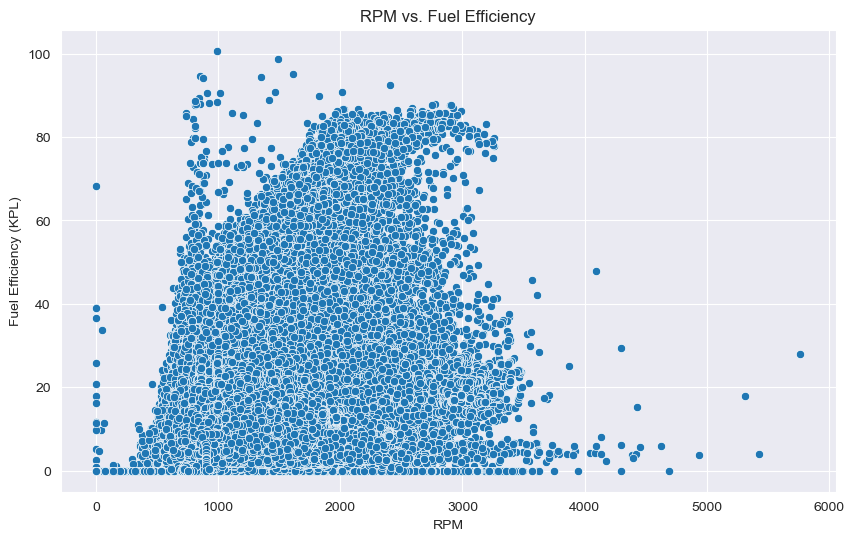

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rpm', y='kpl', data=df)
plt.title('RPM vs. Fuel Efficiency')
plt.xlabel('RPM')
plt.ylabel('Fuel Efficiency (KPL)')
plt.show()

The following visualization plotted above is between the RPM and Fuel Efficiency (KPL) signifies the following: 

1). Below 2500 RPM: Fuel efficiency tends to be lower at very low RPMs (e.g., idling) because the engine isn't operating at its peak efficiency. It consumes more fuel per unit of power produced.

2). Around 2500 RPM: At approximately 1200 RPM, many engines hit an optimal efficiency range. This is where they generate more power for less fuel, resulting in higher fuel efficiency.

3). Above 2500 RPM: Beyond 2500 RPM, fuel efficiency starts to decline as the engine works harder, requiring more fuel to maintain or increase power output.

4). Engine Load Matters: The relationship between RPM and fuel efficiency also depends on factors like engine load and driving conditions. Heavier loads or steep inclines can affect efficiency at any RPM.

5). Technology and Design: Advanced engine technologies and designs can influence this relationship, potentially expanding the RPM range where efficiency is highest.

**For general SI (Spark Ignition) automobile engines, that sweet spot usually lies around 2500~3500 RPM.**

A correlation coefficient of **0.453665** between RPM (Revolutions Per Minute) and kilometers per liter (kpl) suggests a moderate positive linear relationship between these two variables and will take abrupt change at RPM = 1200.

# Throttle Position vs. Fuel Efficiency

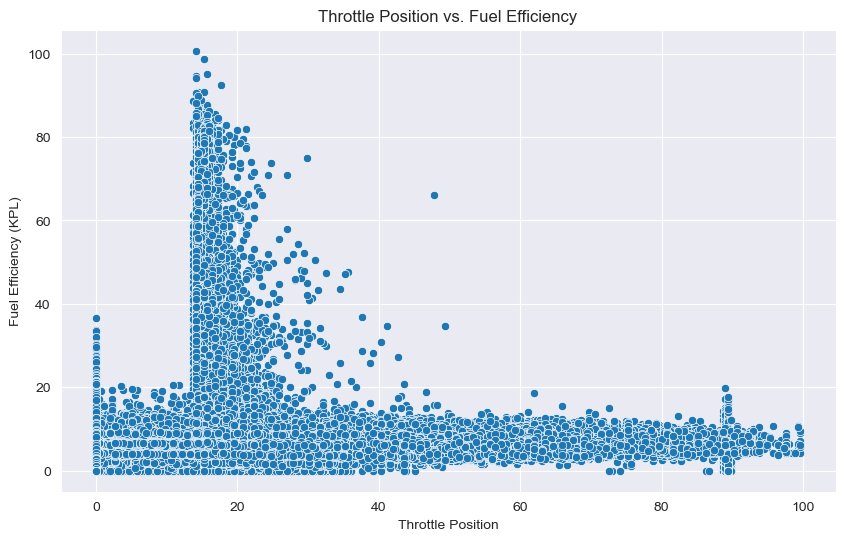

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tPos', y='kpl', data=df)
plt.title('Throttle Position vs. Fuel Efficiency')
plt.xlabel('Throttle Position')
plt.ylabel('Fuel Efficiency (KPL)')
plt.show()


The following visualization plotted above is between the Throttle Position and Fuel Efficiency signifies the following:

1). Throttle Position 0 to 10: At very low throttle positions (close to zero), fuel efficiency remains constant because the engine is operating at minimal power and air intake. This is typical during idling or when you're lightly cruising at a constant speed on level ground. The engine doesn't require much power, and it consumes fuel efficiently.

2). Throttle Position 10: At a throttle position of 10, there is a peak in fuel efficiency. This could represent the engine's "sweet spot" where it operates most efficiently, generating a significant amount of power for a relatively small amount of fuel. Engines are often designed to be most efficient within a specific throttle range.

3). Throttle Position 20 to 40: As the throttle position is increased further (between 20 and 40), fuel efficiency decreases. This is because the engine is now operating at higher power levels, and to maintain or increase power, it requires more fuel. The air-fuel mixture becomes richer (more fuel-rich), resulting in lower efficiency per unit of power produced.

4). Throttle Position >40: Beyond a throttle position of 40, fuel efficiency remains relatively constant or decreases slightly. In this range, the engine is likely operating close to or at wide-open throttle (WOT) conditions, where it's producing maximum power. While the power output is high, the engine is consuming a significant amount of fuel, which tends to result in lower fuel efficiency.

**The optimum and best fuel efficiency comes out to be at Throttle Position ~ 10-12, then decreases with increase in throttle position i.e, widening of open air passage**

A correlation coefficient of **0.222986** between throttle position and fuel efficiency signifies a relatively weak positive linear relationship between these two variables. In practical terms, this means that as the throttle position increases (indicating a wider opening of the throttle), there is a slight tendency for fuel efficiency to improve, but the correlation is not strong. 

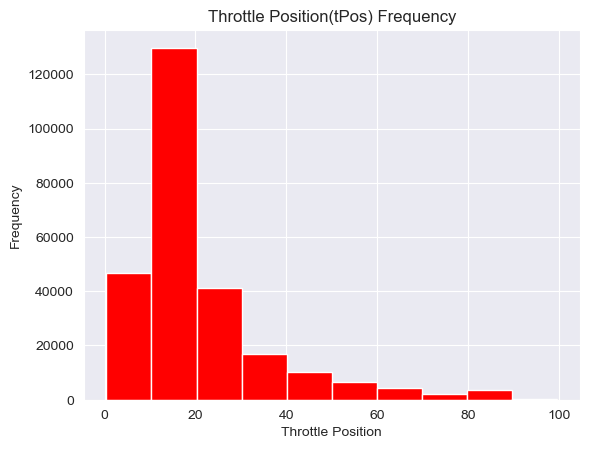

In [29]:
# Filter out the 0 values
filtered_data = [x for x in df['tPos'] if x != 0]

# Create a histogram without the 0 values
plt.hist(filtered_data, bins=10, color='red', edgecolor='white')
plt.xlabel('Throttle Position')
plt.ylabel('Frequency')
plt.title('Throttle Position(tPos) Frequency')
plt.show()

A peak in a histogram of throttle position data at **10%** can suggest that this throttle position value is frequently encountered during driving, potentially indicating common or typical driving conditions where the throttle is moderately open, or it may reflect the use of features like cruise control. tPos=10 is most optimal throttle position for best fuel efficiency.

# RPM vs. Speed

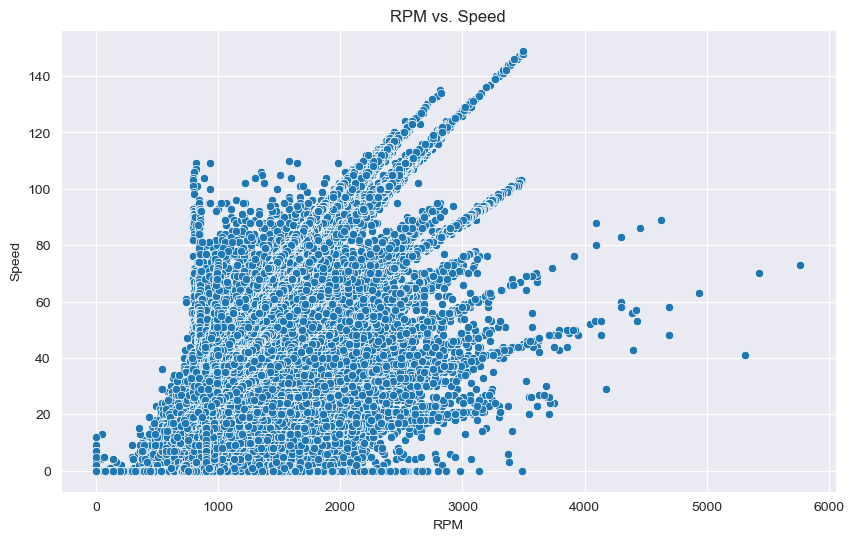

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rpm', y='speed', data=df)
plt.title('RPM vs. Speed')
plt.xlabel('RPM')
plt.ylabel('Speed')
plt.show()

The following visualization plotted above is between the RPM and Speed signifies the following:
Here we have plotted 'RPM' on x-axis and 'Speed' on y-axis, hence lower line will represent gear-1
on going up gears will increase.

**1). Gear Shift Points: The five lines represent the different gear ratios in vehicle's transmission. As the driver accelerate or change speeds, the transmission shifts between these gears to maintain an optimal balance between engine power and efficiency.**

2). Smooth Shifts: Ideally, you want to see smooth transitions between these lines as you accelerate or decelerate. Abrupt changes or "jumps" between lines can indicate issues with the transmission or clutch.

3). Gear Ratio: Each line's angle indicates the gear ratio for that particular gear. Shallower angles typically represent lower gears, which provide more power and acceleration but at the cost of higher engine RPMs. Steeper angles represent higher gears, which allow for better fuel efficiency and lower RPMs at higher speeds (Shallower angles are not depicted clearly here).

A correlation coefficient of **0.794906** between RPM (Revolutions Per Minute) and speed indicates a strong positive linear relationship between these two variables. In practical terms, this means that as the engine's RPM increases, the vehicle's speed tends to increase significantly.

# Accelerometer Data

Accelerometer is a device used to measure the acceleration or vibrations of a motion. The data provided by an accelerometer is three-dimensional and can be used in data-driven applications for analysis.

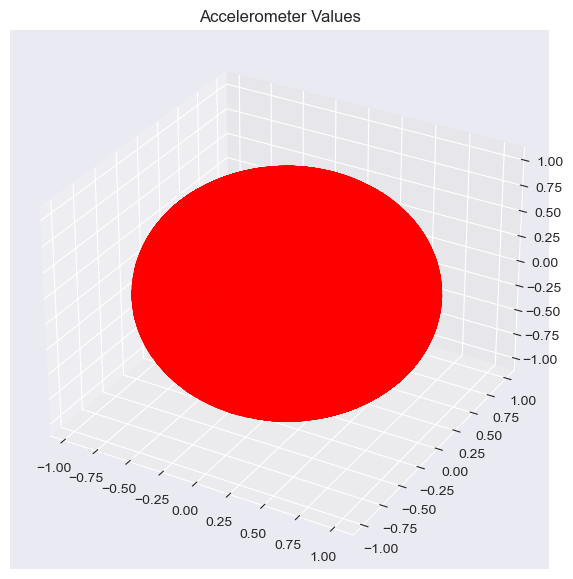

In [19]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
  
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df['x'], df['y'], df['z'], color = "red")
plt.title("Accelerometer Values")
 
# show plot
plt.show()

# Magnetometer Data

Magnetometer Data will provide insights into the magnetic field measurements taken by the vehicle's magnetometer sensor. Magnetometer Data is typically used to determine the vehicle's orientation or heading with respect to the Earth's magnetic field.

1). Measurement of Magnetic Field Strength: A magnetometer measures the strength and direction of the magnetic field at its location. In a car, the magnetometer is typically oriented in such a way that it measures the three components of the magnetic field along the X, Y, and Z axes of the car's coordinate system.

2). Spherical Distribution: When you drive a car around, the magnetometer records the varying strength of the Earth's magnetic field along these three axes as the car changes its orientation and position relative to the Earth's magnetic field lines.

**The resulting data points from the magnetometer measurements will form a spherical distribution in a 3D scatter plot because the magnetometer readings reflect the spherical shape of the Earth's magnetic field.**



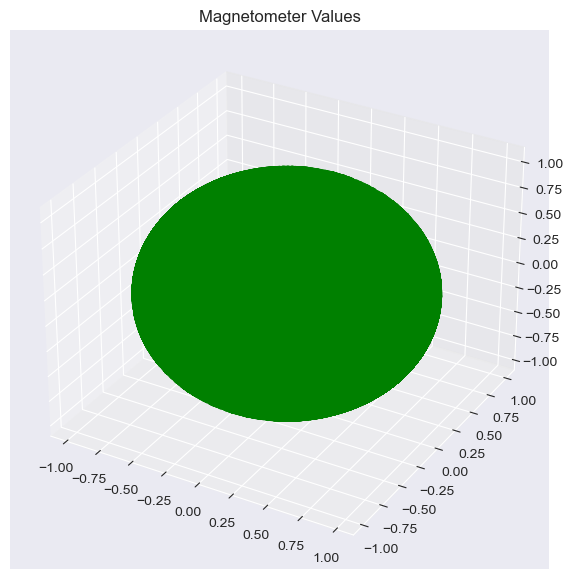

In [20]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
  
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df['mx'], df['my'], df['mz'], color = "green")
plt.title("Magnetometer Values")
 
# show plot
plt.show()

# Speed vs. Fuel Efficiency

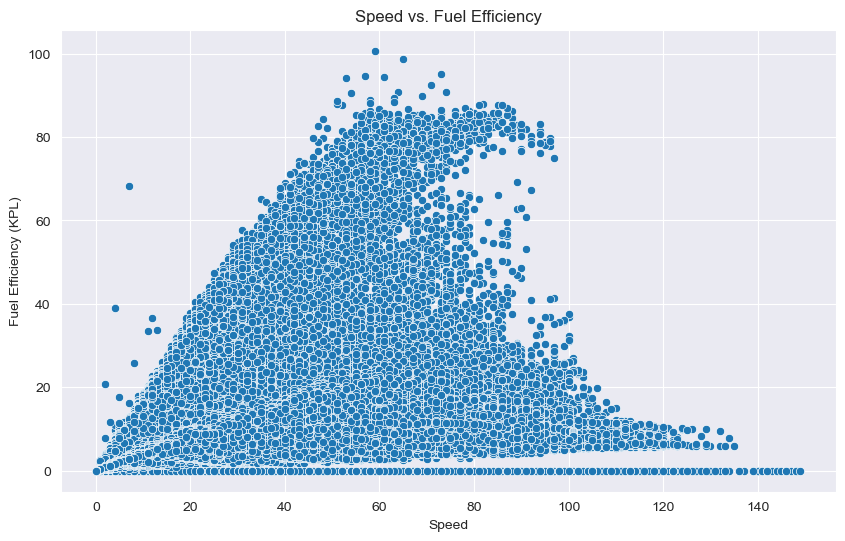

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speed', y='kpl', data=df)
plt.title('Speed vs. Fuel Efficiency')
plt.xlabel('Speed')
plt.ylabel('Fuel Efficiency (KPL)')
plt.show()

The following visualization plotted above is between the Speed and Fuel Efficiency signifies the following:

1). Aerodynamic Efficiency: At lower speeds, vehicles experience less air resistance, leading to better fuel efficiency. As speed increases, air resistance grows exponentially, causing higher fuel consumption.

2). Engine Efficiency: Engines have an optimal operating range where they're most fuel-efficient. This "sweet spot" varies but often falls within moderate speeds.

According to the US Department of Energy, fuel economy decreases significantly at speeds over 80 km/h. **To optimise fuel economy, it is recommended to drive at a consistent speed within the sweet spot for your vehicle, typically between 80-90 km/h (as observed from the plot depicted above).**

Reference : https://www.cars24.com/blog/12-quick-fuel-efficiency-hacks-to-get-20kmpl-average-from-any-car/#:~:text=Optimal%20Speed%3A%20Finding%20the%20Sweet%20Spot%20for%20Mileage&text=According%20to%20the%20US%20Department%20of%20Energy%2C%20fuel%20economy%20decreases,80%2D90%20km%2Fh.

A correlation coefficient of **0.464026** suggests a moderate positive correlation between speed and fuel efficiency (kpl), meaning that, in general, as vehicle speed increases, fuel efficiency tends to improve moderately. 

# Manifold Absolute Pressure (Kpa) vs. Intake Air Temperature

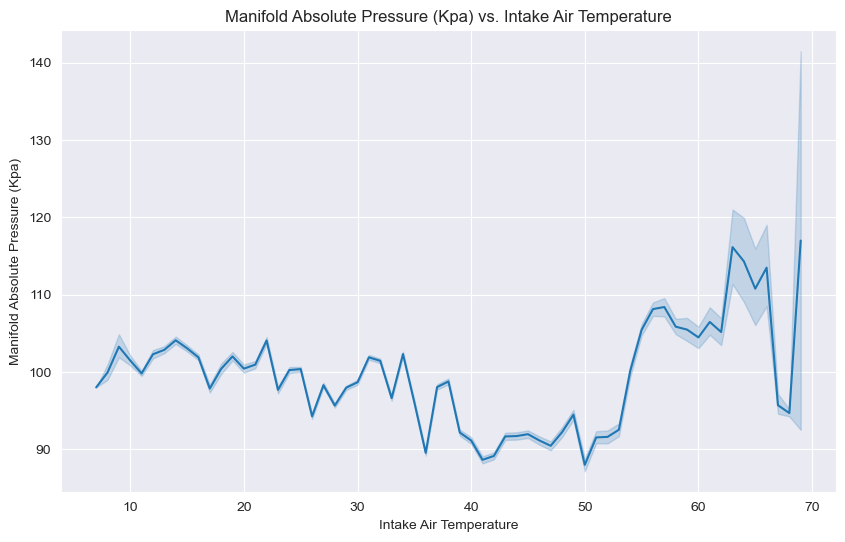

In [29]:
# Filter the data to include only positive and non-zero IAT values
filtered_df = df[(df['iat'] > 0) & (df['imap'] > 0)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='iat', y='imap', data=filtered_df)
plt.title('Manifold Absolute Pressure (Kpa) vs. Intake Air Temperature')
plt.ylabel('Manifold Absolute Pressure (Kpa)')
plt.xlabel('Intake Air Temperature')
plt.show()

The following visualization plotted above is between the Manifold Absolute Pressure and Intake Air Temperature signifies the following:

1). Optimal Operating Range: The relatively stable Manifold Absolute Pressure(imap) around **100** for most IAT values might indicate an optimal operating range where the engine operates efficiently.

2). Deviation: As IAT rises in the specified range, the air entering the engine becomes less dense. Lower air density can lead to a decrease in MAP because there is less air entering the intake manifold.

A correlation coefficient of **0.692645** between Manifold Absolute Pressure (IMAP) and Intake Air Temperature (IAT) indicates a strong positive relationship. This means that as IAT increases, IMAP tends to rise significantly. This correlation likely reflects how changes in air temperature impact engine performance, particularly the pressure within the intake manifold, with higher temperatures often leading to increased pressure.

# Intake Air Temperature vs. RPM

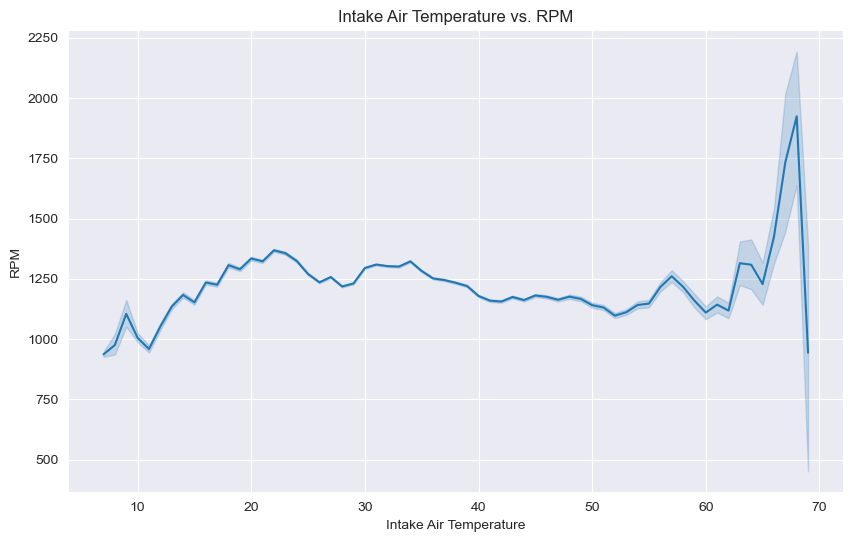

In [44]:
# Filter the data to include only positive and non-zero IAT values
filtered_df = df[(df['iat'] > 0) & (df['rpm'] > 0)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='iat', y='rpm', data=filtered_df)
plt.title('Intake Air Temperature vs. RPM')
plt.xlabel('Intake Air Temperature')
plt.ylabel('RPM')
plt.show()

The following visualization plotted above is between the Intake Air Temperature and RPM signifies the following:

1). One common scenario where IAT increases with RPM is during high engine load conditions. When the engine is operating at higher RPM, it often generates more heat due to increased combustion and friction.

2). This increase in heat can impact the temperature of the air entering the engine.     
**Warmer engine components and increased airflow can lead to higher IAT.**

# Manifold Air Pressure  vs. RPM

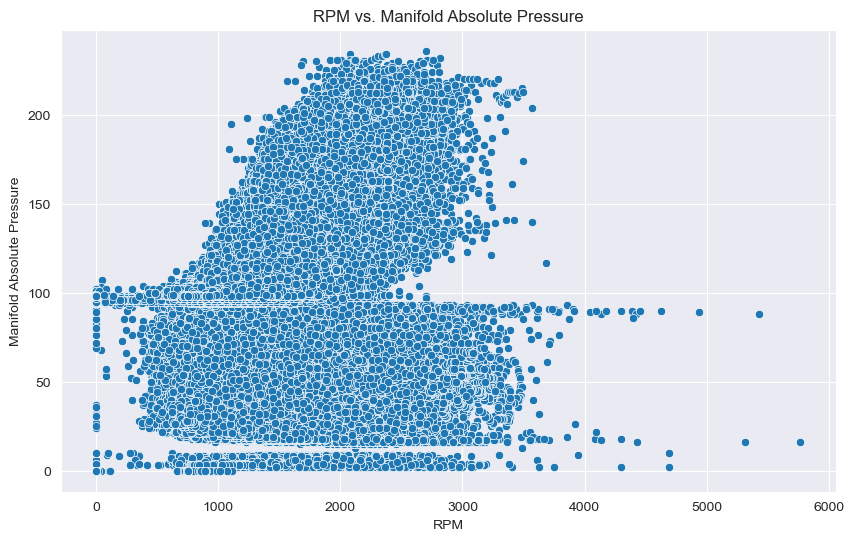

In [5]:
# Filter the data to include only positive and non-zero IAT values
filtered_df = df[(df['rpm'] > 0) & (df['imap'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rpm', y='imap', data=df)
plt.title('RPM vs. Manifold Absolute Pressure')
plt.xlabel('RPM')
plt.ylabel('Manifold Absolute Pressure')
plt.show()

The following visualization plotted above is between the Manifold Absolute Pressure and Intake Air Temperature signifies the following:

1). Throttle Response: At lower RPMs, when you press the throttle pedal, the throttle plate opens to allow more air into the engine. This initial increase in throttle opening results in a sudden drop in intake pressure (MAP) because the engine is drawing in more air, and the pressure decreases as a result. This is often referred to as "throttle lag."

2). Intake System Design: Many modern engines are designed with variable-length intake manifolds or variable valve timing. These technologies optimize the engine's performance at different RPM ranges. **As you increase RPMs, these systems adjust to provide more favorable intake conditions, including higher MAP. This can lead to an increase in MAP as the engine reaches its optimal operating range.**

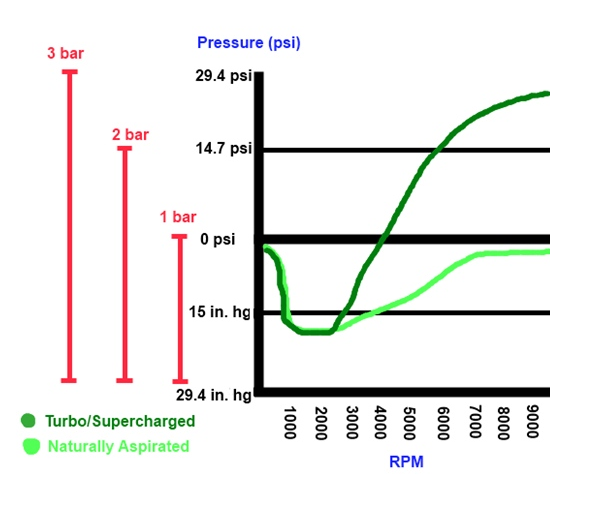

Reference : https://www.1aauto.com/content/articles/what-does-a-map-sensor-do-what-is-it

# Correlation Matrix

Correlation Matrix can help us to view correlation between different columns as depicted below

C:\Users\Mukul\AppData\Local\Temp\ipykernel_19416\1534696721.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


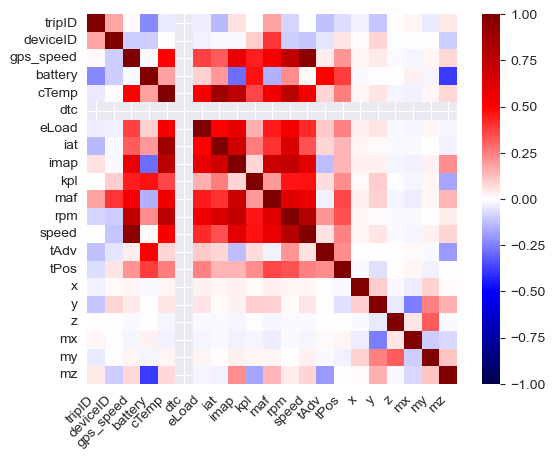

In [35]:
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='seismic', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# Air Mass

Air Mass calculation is a crucial step in engine control systems for determining the amount of air entering the engine's intake manifold. This calculation is essential for achieving the correct air-fuel ratio for combustion. The formula to calculate air mass is as follows:

**Air Mass (kg) = Air Density Correction Factor × Air Density (kg/m³) × Intake Air Volume (m³)**


**Step 1: Measure Intake Air Temperature (IAT):**

   - Measure the intake air temperature (IAT) using the IAT sensor. IAT is recorded in degrees Celsius (°C).

**Step 2: Calculate Air Density (ρ):**

   - Air density (ρ) is calculated using the ideal gas law:

     **Air Density (ρ) = P / (R × T)**

     Where:
     - **P**: Atmospheric Pressure (Pascals)
     - **R**: Specific Gas Constant for Dry Air (287.1 J/(kg·K))
     - **T**: Absolute Temperature in Kelvin (K = °C + 273.15)

**Step 3: Calculate Air Density Correction Factor (Molar Mass Ratio):**

   - The air density correction factor accounts for the composition of ambient air, which is a mixture of gases. It's calculated as the ratio of the molar mass of dry air to the molar mass of pure oxygen:

     **Correction Factor (Molar Mass Ratio) = 32 / 28.97**

     Where:
     - Molar Mass of Dry Air ≈ 28.97 g/mol
     - Molar Mass of Pure Oxygen ≈ 32 g/mol

**Step 4: Calculate Air Volume (V):**

   - Air volume (V) is calculated based on the engine's displacement and the number of revolutions it completes in a given time. Alternatively, it can be measured directly using a volumetric flow sensor.

**Step 5: Perform the Air Mass Calculation:**

   - Use the following formula to calculate air mass (kg):

     **Air Mass (kg) = (Air Density) × (Intake Air Volume) / (Air Density Correction Factor)**

This process is essential in engine control systems to determine the correct air-fuel ratio for combustion, ensuring optimal engine performance and emissions. Modern engine control units (ECUs) perform these calculations automatically using sensor data for real-time adjustments.

In [47]:
# Constants for air calculations
gas_constant = 287.1  # J/(kg·K), specific gas constant for dry air
molar_mass_ratio = 28.97 / 32  # Correction factor (molar mass ratio)

# Function to calculate air mass
def calculate_air_mass(iat, rpm):
    # Convert IAT to Kelvin
    iat_kelvin = iat + 273.15

    # Calculate air density
    air_density = 101325 / (gas_constant * iat_kelvin)

    # Calculate air volume 
    engine_displacement = 2.0
    engine_speed = rpm / 60  # Converting RPM to revolutions per second
    air_volume = engine_displacement * engine_speed

    # Calculate air mass
    air_mass = (air_density * air_volume) / molar_mass_ratio

    return air_mass

# Applying the calculate_air_mass function to our dataset
df['Air Mass (kg)'] = df.apply(lambda row: calculate_air_mass(row['iat'], row['rpm']), axis=1)

# Printing the DataFrame with the calculated air mass
print(df[['iat', 'rpm', 'Air Mass (kg)']])


         iat      rpm  Air Mass (kg)
0         40  1010.75      41.942565
1         40   815.50      33.840377
2         40   862.25      35.780338
3         40   817.00      33.902622
4         40   804.25      33.373542
...      ...      ...            ...
1048559    0     0.00       0.000000
1048560    0     0.00       0.000000
1048561    0     0.00       0.000000
1048562    0     0.00       0.000000
1048563    0     0.00       0.000000

[1048564 rows x 3 columns]


# Fuel Consumption

Certainly, here's the process of calculating required fuel consumption :

**Step 1: Determine Air Mass (kg):**
   - Calculate the air mass entering the engine using the Intake Air Temperature (IAT), Engine RPM, and relevant parameters.
   
**Step 2: Estimate Stoichiometric Air-Fuel Ratio:**
   - Determine the stoichiometric air-fuel ratio specific to your fuel type (e.g., gasoline, diesel).
   - For gasoline, the stoichiometric ratio is typically around 14.7:1 (14.7 parts air to 1 part fuel by mass).

**Step 3: Calculate Fuel Mass (kg):**
   - Divide the air mass by the stoichiometric air-fuel ratio:
   
   - **Fuel Mass (kg) = Air Mass (kg) / Stoichiometric Air-Fuel Ratio**
   

**Step 4: Convert Fuel Mass to Fuel Volume (L):**
   - If we want to express fuel consumption in volume (e.g., liters), we can consider the density of our fuel. Gasoline, for example, has an approximate density of 0.74 kg/L:

   - **Fuel Volume (L) = Fuel Mass (kg) / Fuel Density (kg/L)**
   

**Step 5: Aggregate Fuel Consumption:**
   - To calculate fuel consumption over a specific time period (e.g., per trip), sum the fuel consumption for all relevant data points within that period.

In [56]:
# Constants
stoichiometric_ratio = 14.7  # Stoichiometric air-fuel ratio for gasoline
fuel_density = 0.74  # Density of gasoline in kg/L

# Function to calculate fuel consumption (in liters)
def calculate_fuel_consumption(air_mass):
    fuel_mass = air_mass / stoichiometric_ratio
    fuel_volume = fuel_mass / fuel_density
    return fuel_volume

# Applying the calculate_fuel_consumption function to our dataset
df['Fuel Consumption (L)'] = df['Air Mass (kg)'].apply(calculate_fuel_consumption)

# Printing the DataFrame with the calculated fuel consumption
print(df[['iat', 'rpm', 'Air Mass (kg)', 'Fuel Consumption (L)']])


         iat      rpm  Air Mass (kg)  Fuel Consumption (L)
0         40  1010.75      41.942565              3.855724
1         40   815.50      33.840377              3.110901
2         40   862.25      35.780338              3.289239
3         40   817.00      33.902622              3.116623
4         40   804.25      33.373542              3.067985
...      ...      ...            ...                   ...
1048559    0     0.00       0.000000              0.000000
1048560    0     0.00       0.000000              0.000000
1048561    0     0.00       0.000000              0.000000
1048562    0     0.00       0.000000              0.000000
1048563    0     0.00       0.000000              0.000000

[1048564 rows x 4 columns]


In [58]:
df.head()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,...,tAdv,tPos,x,y,z,mx,my,mz,Air Mass (kg),Fuel Consumption (L)
0,1,0,22-12-2017 18:43:05,"[[-0.7125646799364715, 0.23595627204810762, -0...",24.2612,0.0,66,0,28.6275,40,...,0.0,0.0,-0.712565,-0.102792,-0.642793,-0.606691,-0.242957,0.750273,41.942565,3.855724
1,1,0,22-12-2017 18:43:06,"[[0.4707973949441242, 0.2820489662721335, -0.8...",23.1500,0.0,66,0,33.7255,40,...,0.0,0.0,0.470797,-0.012553,0.870071,-0.823183,0.311466,0.450998,33.840377,3.110901
2,1,0,22-12-2017 18:43:07,"[[0.363406940121187, 0.6533333333333333, -0.64...",18.7052,0.0,66,0,43.1373,40,...,0.0,0.0,0.363407,0.661540,-0.636267,-0.644692,-0.309709,-0.649965,35.780338,3.289239
3,1,0,22-12-2017 18:43:08,"[[-0.07687828192948323, 0.3061005733016679, 0....",16.4828,0.0,66,0,41.5686,40,...,0.0,0.0,-0.076878,-0.191656,0.956181,0.925914,0.283531,0.170642,33.902622,3.116623
4,1,0,22-12-2017 18:43:09,"[[-0.4349511173745513, 0.13824774070828527, -0...",17.4088,0.0,66,0,43.1373,40,...,0.0,0.0,-0.434951,-0.002994,-0.867992,-0.856917,-0.154537,0.469679,33.373542,3.067985


# Driver Volume (Time of Day)

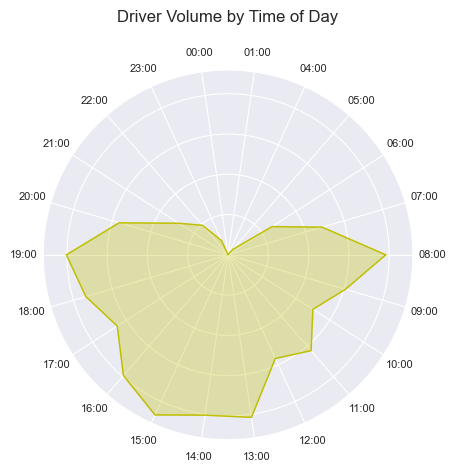

In [69]:
hour_buckets = pd.to_datetime(df['timeStamp']).dt.hour.value_counts().sort_index()
hours, hour_counts = hour_buckets.index.to_list(), hour_buckets.to_list()

# rotate by 90 degrees counter clockwise so the chart is more
# intuitive, then reverse
hours = (hours[7:] + hours[:7])[::-1]
hour_counts = (hour_counts[7:] + hour_counts[:7])[::-1]

# turn hours into a reader-friendly format
hours = [str(h).zfill(2) + ':00' for h in hours]

hour_counts.append(hour_counts[0])
N = len(hours)
angles = [i / float(N) * 2 * pi for i in range(N)]
angles.append(angles[0])

ax = plt.subplot(polar=True)
plt.title('Driver Volume by Time of Day\n')
plt.xticks(angles[:-1], hours, size=8)
ax.set_yticklabels([])
ax.plot(angles, hour_counts, color='y', linewidth=1)
ax.fill(angles, hour_counts, alpha=0.3, color='y')
plt.show()

The observation that the covered area of driver volume is primarily from 8 A.M to 7 P.M on a pie chart likely signifies that the majority of driving activity occurs during these hours of the day.

# Driver Volume (Day of Week)

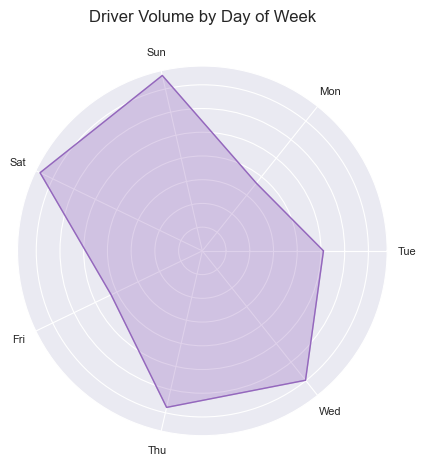

In [70]:
# radar chart to visualize distribution of datapoints by the day of week
wd_buckets = pd.to_datetime(df['timeStamp']).dt.weekday.value_counts().sort_index()
weekdays, wd_counts = wd_buckets.index.to_list(), wd_buckets.to_list()
wd_list = [
    'Mon',
    'Tue',
    'Wed',
    'Thu',
    'Fri',
    'Sat',
    'Sun'
]
weekdays = [wd_list[x] for x in weekdays]

# rotate counter clockwise so the chart is more
# intuitive, then reverse
weekdays = (weekdays[2:] + weekdays[:2])[::-1]
wd_counts = (wd_counts[2:] + wd_counts[:2])[::-1]

wd_counts.append(wd_counts[0])
N = len(weekdays)
angles = [i / float(N) * 2 * pi for i in range(N)]
angles.append(angles[0])

ax = plt.subplot(polar=True)
plt.title('Driver Volume by Day of Week\n')
plt.xticks(angles[:-1], weekdays, size=8)
ax.set_yticklabels([])
ax.plot(angles, wd_counts, color='tab:purple', linewidth=1)
ax.fill(angles, wd_counts, alpha=0.3, color='tab:purple')
plt.show()

The observation that the covered area of driver volume on a pie chart likely signifies when did the majority of driving activity occurs.

# Total Hours Logged (Scatter Plot)

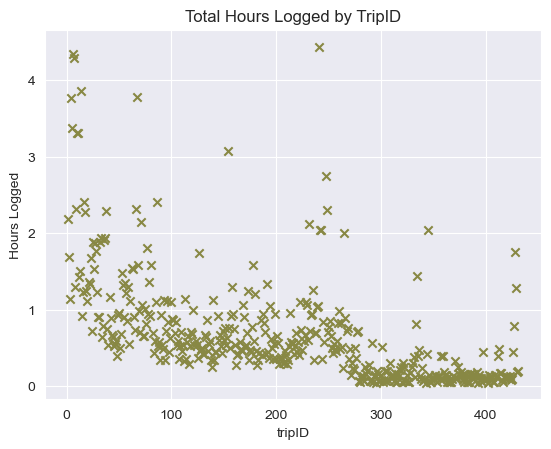

In [74]:
#Plotting total hours logged per tripID using Scatter plot
hours_by_trip = df['tripID'].value_counts()/(60*60)
plt.scatter(x=hours_by_trip.index, y=hours_by_trip,
           color='#888844', marker='x')
plt.title('Total Hours Logged by TripID')
plt.xlabel('tripID')
plt.ylabel('Hours Logged')
plt.show()

# Trip Hours

In [75]:
#Calculating total hours covered per trip
hours_by_trip.sort_values(ascending=False).head(5)

241    4.438611
6      4.342500
7      4.294444
14     3.858611
67     3.779167
Name: tripID, dtype: float64

# Paramters Histogram

Visualizing certain histogram that can help us to have better analysis

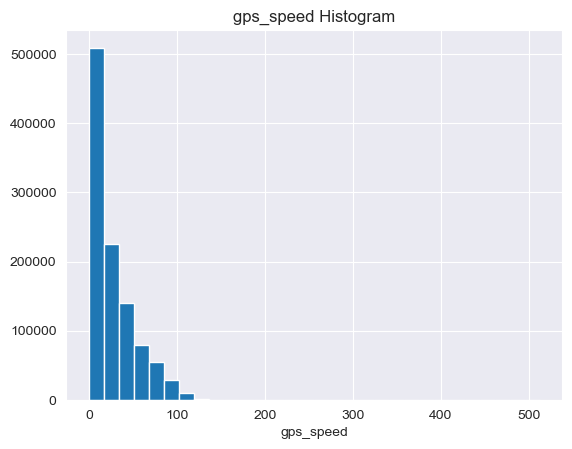

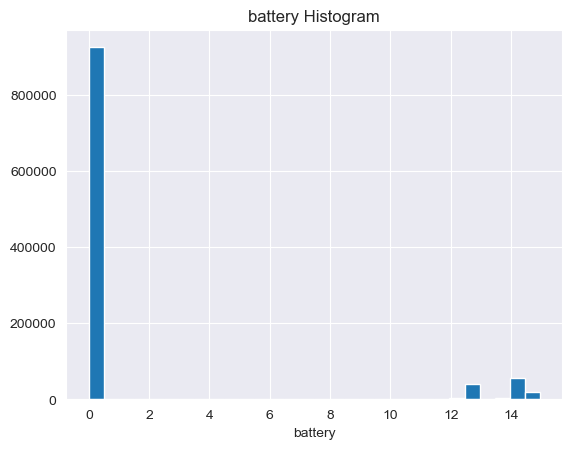

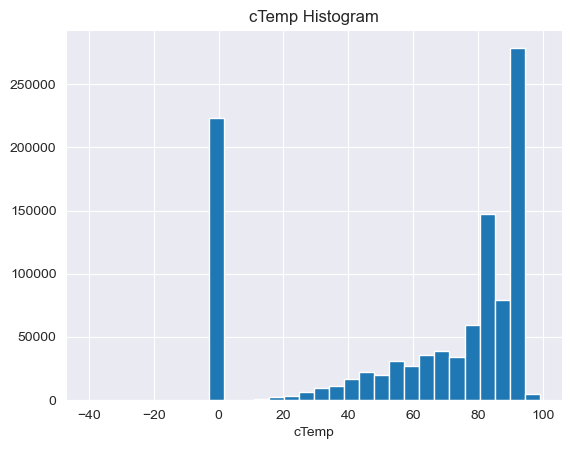

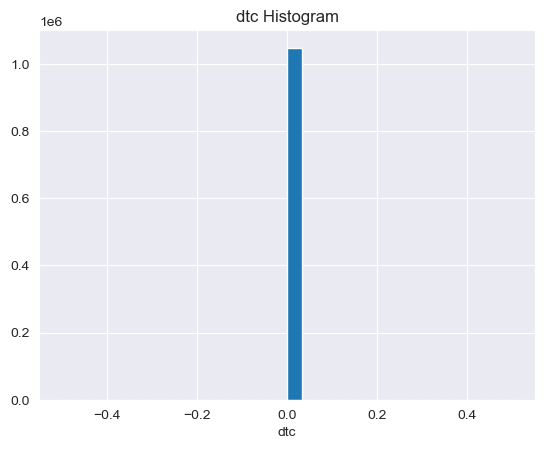

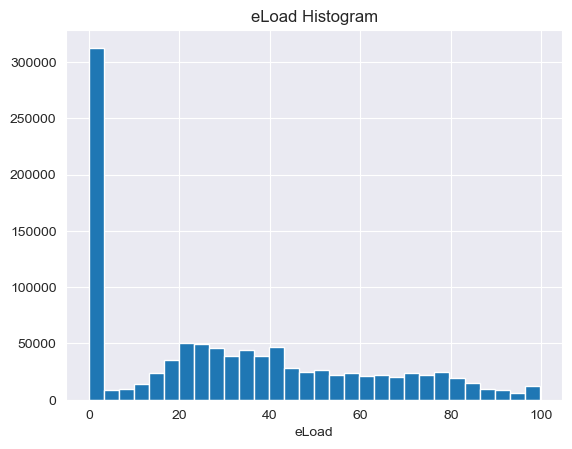

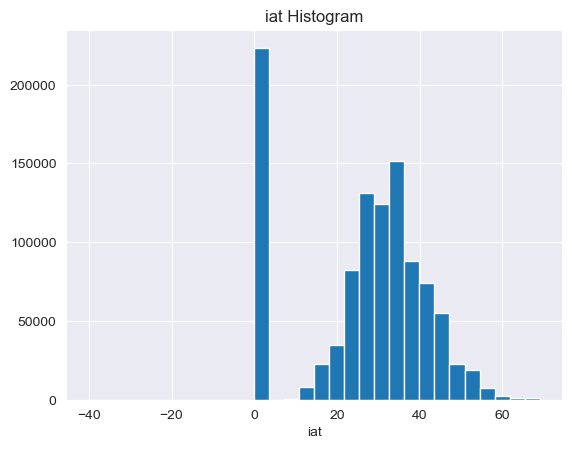

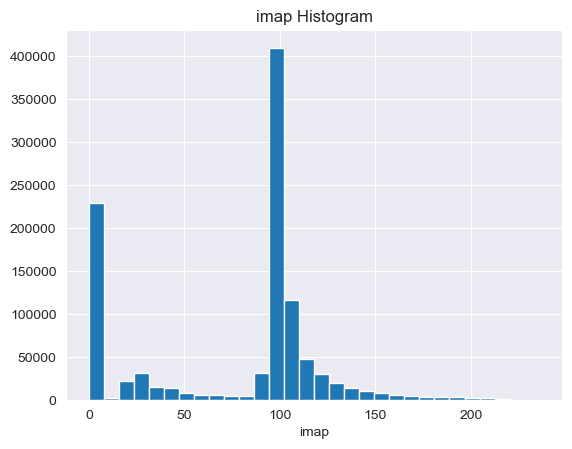

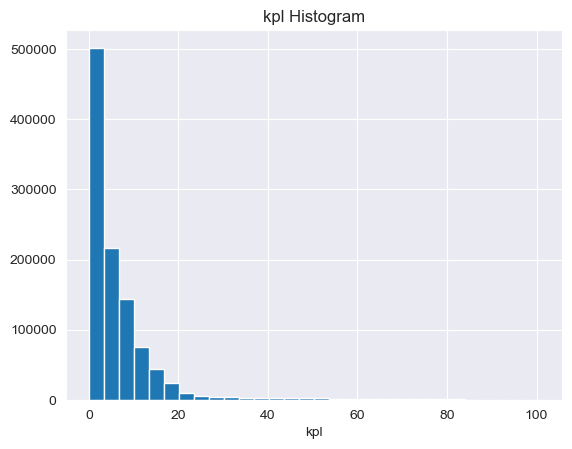

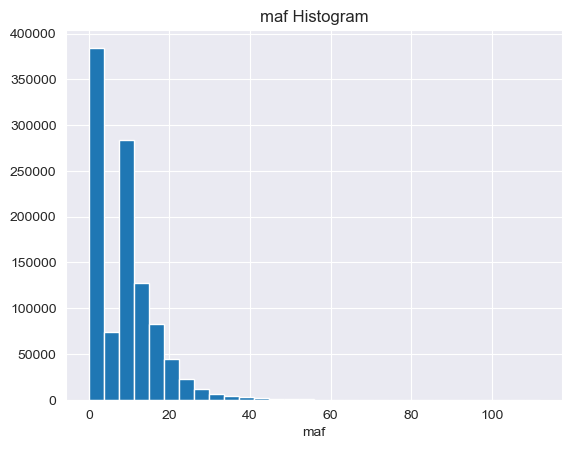

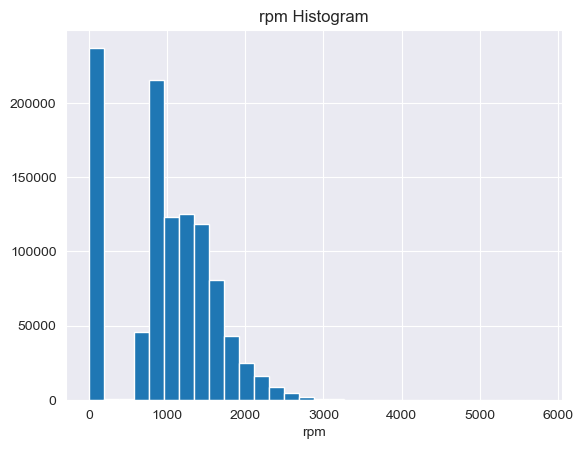

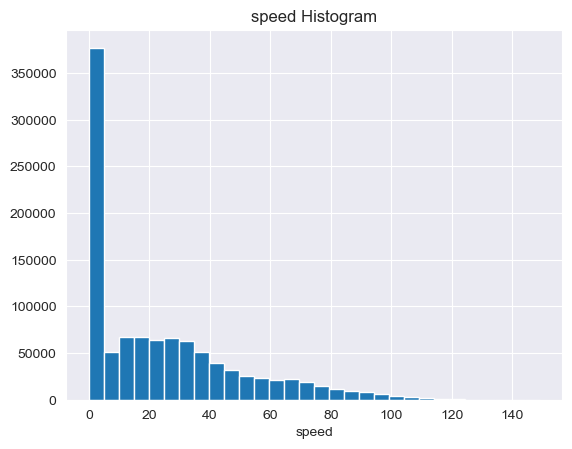

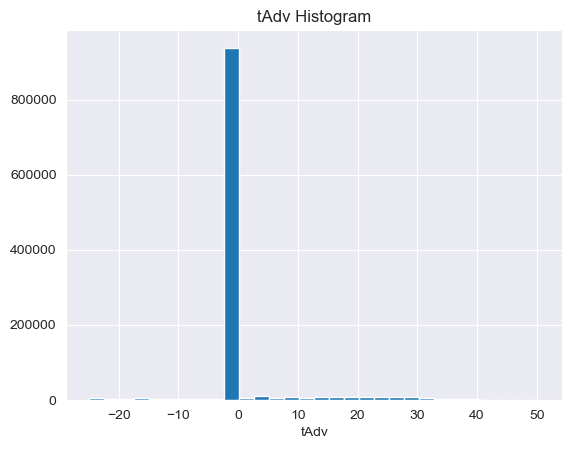

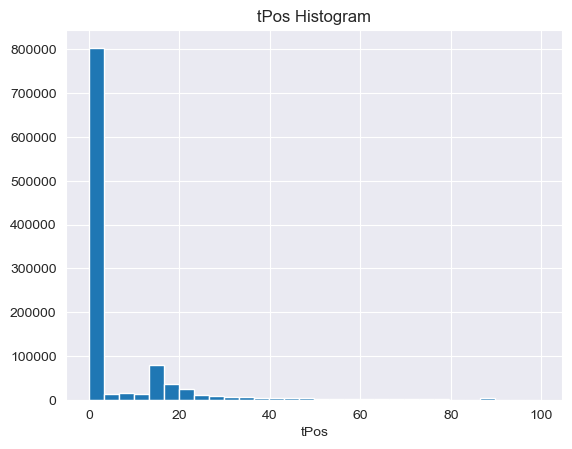

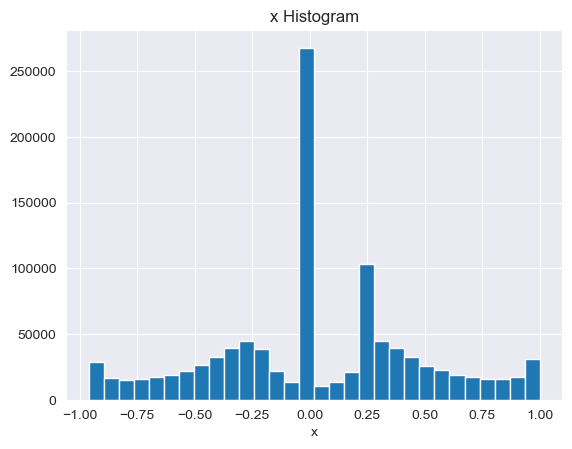

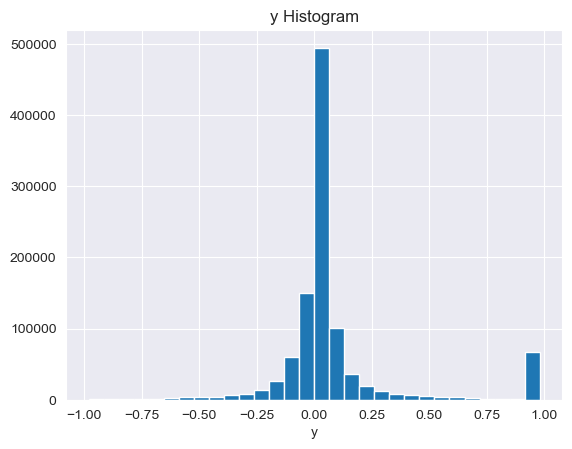

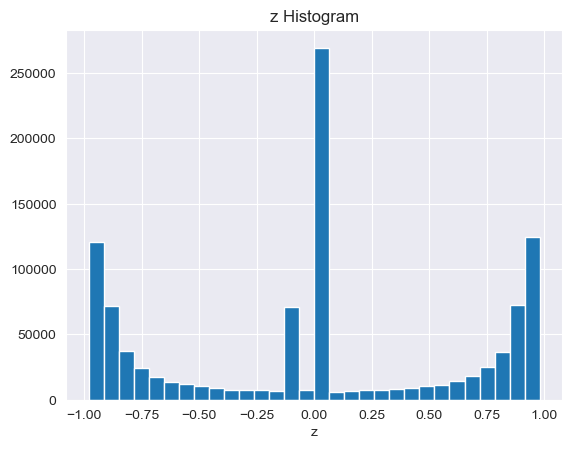

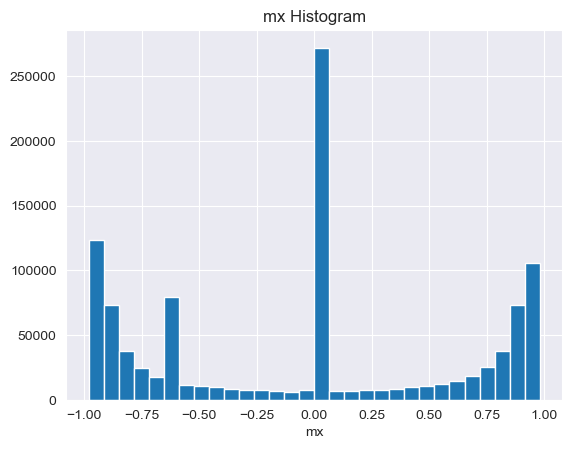

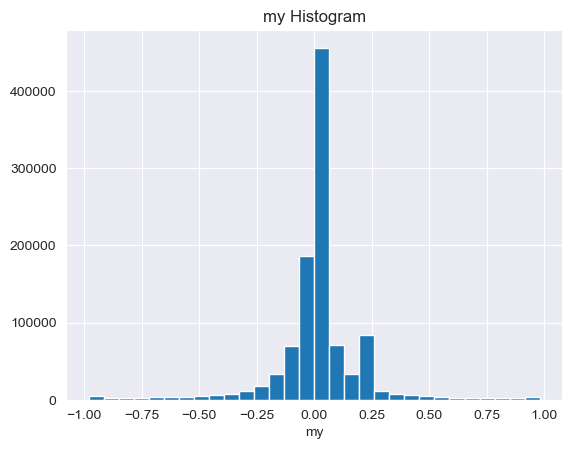

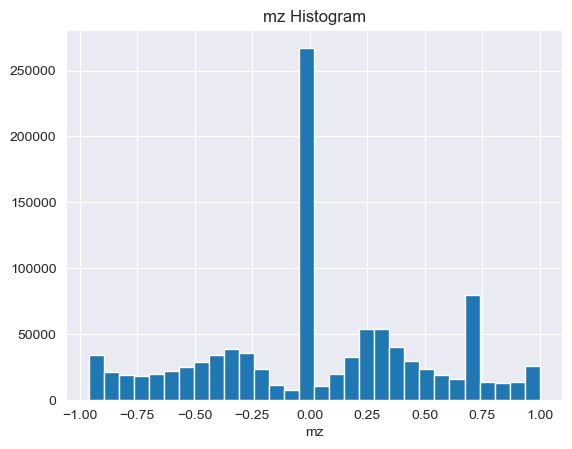

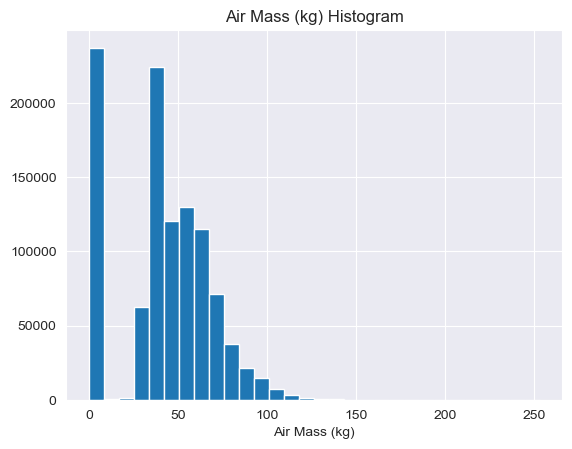

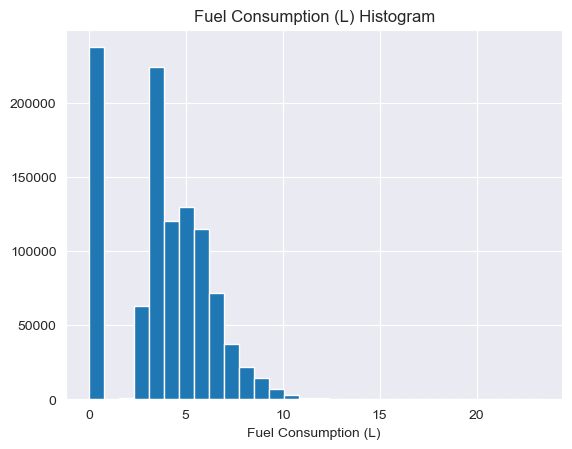

In [76]:
#Filtering the columns not required for analysis
cols_to_not_plot = set([
    'timeStamp',
    'tripID',
    'accData',
    'deviceID'
])

#Plotting Hisograms
for col in df.columns:
    if col not in cols_to_not_plot:
        plt.hist(df[col], bins=30)
        plt.title(f'{col} Histogram')
        plt.xlabel(col)
        plt.show()